<a href="https://colab.research.google.com/github/sidmaitra/System_Design_Lab_Assignment/blob/main/math%20assignment%201%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Geometric Random Variable

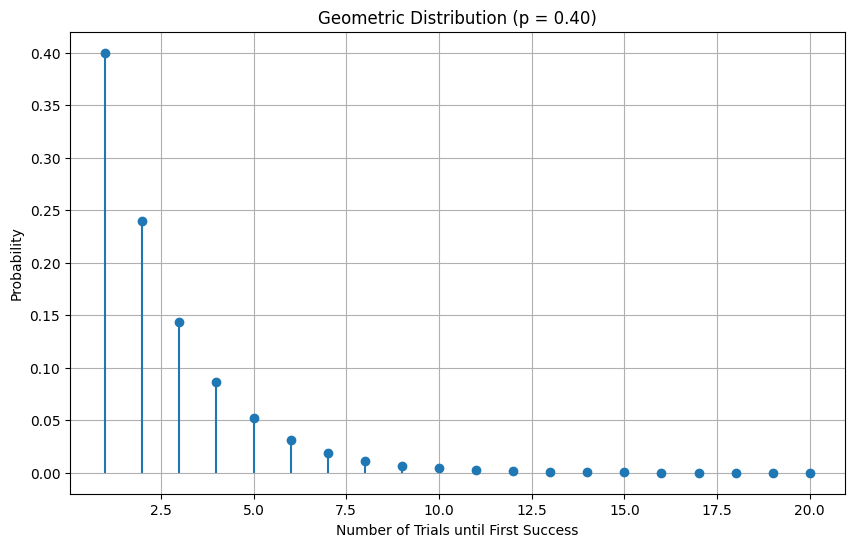

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def geometric_prob(x, p):
    '''
    Function to calculate the probability for a geometric distribution
    params:
        x: number of times the event does not occur before the first success (the trial number on which the first success occurs)
        p: probability of an event occurring on each trial (probability of success). It must be a number between 0 and 1.
    return: probability of success occurring on the x-th trial
    '''
    if x < 1:
        raise ValueError("The trial number must be positive!")
    if not (0 < p <= 1):
        raise ValueError("The probability should be between 0 and 1")

    probability = (1 - p) ** (x - 1) * p
    return probability

# Parameters
p = 0.4  # Probability of success
x_values = np.arange(1, 21)  # Number of trials from 1 to 20

# Calculate geometric distribution probabilities
probabilities = [geometric_prob(x, p) for x in x_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.stem(x_values, probabilities, basefmt=" ")
plt.title('Geometric Distribution (p = {:.2f})'.format(p))
plt.xlabel('Number of Trials until First Success')
plt.ylabel('Probability')
plt.grid(True)
plt.show()


### POISSON RANDOM VARIABLE

Enter distribution (geometric, binomial, poisson, uniform): geometric
Enter start and end points: 1 10
Enter probability of success: 0.5


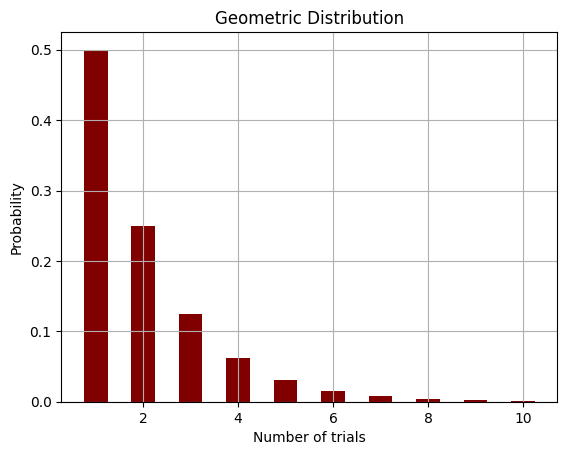

In [ ]:
import math
import matplotlib.pyplot as plt

def geometric(x, p):
    if x < 1 or not (0 < p <= 1): raise ValueError("Invalid inputs")
    return (1 - p) ** (x - 1) * p

def binomial(n, p, x):
    if n <= 0 or not (0 <= x <= n) or not (0 < p <= 1): raise ValueError("Invalid inputs")
    from math import comb
    return comb(n, x) * (p ** x) * ((1 - p) ** (n - x))

def poisson_pmf(k, lam):
    if k < 0 or lam <= 0: raise ValueError("Invalid inputs")
    return (math.exp(-lam) * lam ** k) / math.factorial(k)

def uniform_pdf(x, a, b):
    return 1 / (b - a) if a <= x <= b else 0

def plot(name, res, start, end):
    plt.bar(range(start, end + 1), res, color='maroon', width=0.5)
    plt.xlabel('Number of trials'); plt.ylabel('Probability')
    plt.title(f'{name.capitalize()} Distribution')
    plt.grid(True); plt.show()

if __name__ == '__main__':
    dist = input("Enter distribution (geometric, binomial, poisson, uniform): ").lower()
    start, end = map(int, input("Enter start and end points: ").split())
    res = []
    if dist == 'geometric':
        p = float(input("Enter probability of success: "))
        res = [geometric(x, p) for x in range(start, end + 1)]
    elif dist == 'binomial':
        n, p = map(float, input("Enter trials and probability: ").split())
        res = [binomial(int(n), p, x) for x in range(start, end + 1)]
    elif dist == 'poisson':
        lam = float(input("Enter rate (lambda): "))
        res = [poisson_pmf(x, lam) for x in range(start, end + 1)]
    elif dist == 'uniform':
        a, b = map(int, input("Enter lower and upper bounds: ").split())
        res = [uniform_pdf(x, a, b) for x in range(start, end + 1)]
    plot(dist, res, start, end)


# Binomial Random Variable


Binomial Probabilities:
P(X=0) = 0.000061
P(X=1) = 0.000854
P(X=2) = 0.005554
P(X=3) = 0.022217
P(X=4) = 0.061096
P(X=5) = 0.122192
P(X=6) = 0.183289
P(X=7) = 0.209473
P(X=8) = 0.183289
P(X=9) = 0.122192
P(X=10) = 0.061096
P(X=11) = 0.022217
P(X=12) = 0.005554
P(X=13) = 0.000854
P(X=14) = 0.000061


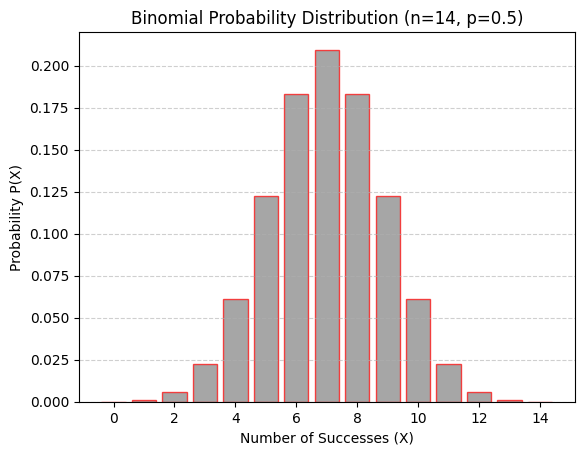

In [3]:
import math
import matplotlib.pyplot as plt

def calculate_binomial_probabilities(n, p, values):
    """
    Calculate the binomial probabilities for given values.

    Parameters:
        n (int): Total number of trials.
        p (float): Probability of success in each trial.
        values (list[int]): A list of possible numbers of successes.

    Returns:
        list[float]: A list of probabilities for each value in `values`.
    """
    # Validate inputs
    if not (0 < p < 1):
        raise ValueError("Probability `p` must be between 0 and 1 (exclusive).")
    if n <= 0:
        raise ValueError("Number of trials `n` must be greater than 0.")

    # Calculate probabilities
    probabilities = [
        math.comb(n, k) * (p**k) * ((1 - p)**(n - k)) for k in values
    ]
    return probabilities

# Parameters
n = 14  # Number of trials
p = 0.5  # Probability of success
values = range(0, n + 1)  # All possible outcomes from 0 to n

# Calculate probabilities
probabilities = calculate_binomial_probabilities(n, p, values)

# Print the probabilities
print("Binomial Probabilities:")
for value, probability in zip(values, probabilities):
    print(f"P(X={value}) = {probability:.6f}")

# Plot the binomial probability distribution
plt.bar(values, probabilities, color='gray', edgecolor='red', alpha=0.7, width=0.8)
plt.xlabel("Number of Successes (X)")
plt.ylabel("Probability P(X)")
plt.title(f"Binomial Probability Distribution (n={n}, p={p})")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# Uniform Random Variables

'-2' is not used as it is a negative number.
'0' is not in between '1' and '6'.
'8' is not in between '1' and '6'.
P(X=1) = 1/6
P(X=2) = 1/6
P(X=3) = 1/6
P(X=4) = 1/6
P(X=5) = 1/6
P(X=6) = 1/6


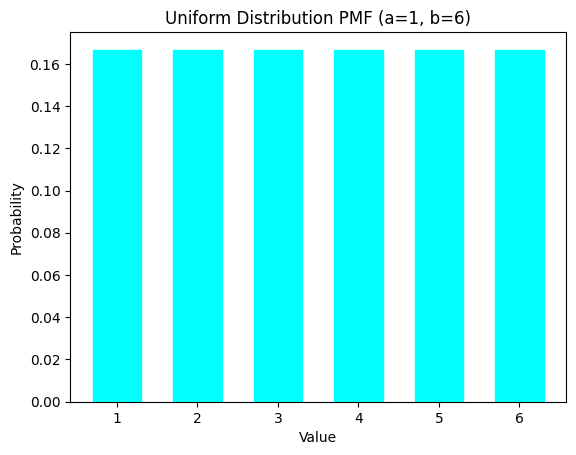

In [6]:
from fractions import Fraction
import matplotlib.pyplot as plt

def get_uniform_prob(a: int, b: int, vals: list[int]) -> list[float]:
    """
    Calculates the uniform probability for a given set of values,
    discarding negative numbers and printing messages for invalid values.

    Args:
        a (int): The lower bound of the uniform distribution.
        b (int): The upper bound of the uniform distribution.
        vals (list): A list of integer values.

    Returns:
        list: A list of probabilities corresponding to valid input values.
    """
    if a > b:
        raise ValueError("Lower bound 'a' must be less than or equal to upper bound 'b'")

    prob = Fraction(1, b - a + 1)  # Uniform probability for each valid value
    valid_probs = []
    valid_vals = []

    for val in vals:
        if val < 0:
            print(f"'{val}' is not used as it is a negative number.")
        elif a <= val <= b:
            valid_probs.append(prob)
            valid_vals.append(val)
        else:
            print(f"'{val}' is not in between '{a}' and '{b}'.")

    return valid_vals, valid_probs

# Parameters for the uniform distribution
a = 1  # Lower bound
b = 6  # Upper bound
vals = [-2, 0, 1, 2, 3, 4, 5, 6, 8]  # Including negatives and out-of-range values

# Calculate valid values and their probabilities
valid_vals, valid_probs = get_uniform_prob(a, b, vals)

# Print the probabilities for valid values
for val, prob in zip(valid_vals, valid_probs):
    print(f"P(X={val}) = {prob}")

# Plot only valid values and their probabilities
plt.bar(valid_vals, [float(p) for p in valid_probs], color='cyan', edgecolor='cyan', align='center', width=0.6)
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title(f'Uniform Distribution PMF (a={a}, b={b})')
plt.show()
